# Análisis Exploratorio y Procesamiento de Datos 

## Importación de datasets y librerías

In [2]:
import pandas as pd
import numpy as np

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
## chequeamos el working directory
%pwd

'd:\\Luna\\Documents\\Repositorios\\IngeniasDataScience\\notebooks'

In [4]:
# importamos el dataset en una varialbe llamada amazon
amazon = pd.read_csv('..\\datasets\\amazon_prime_titles.csv')
hulu = pd.read_csv('..\\datasets\\hulu_titles.csv')
disney = pd.read_csv('..\\datasets\\disney_plus_titles.csv')
netflix = pd.read_csv('..\\datasets\\netflix_titles.csv')

In [7]:
## vemos la forma del dataset
forma_amazon = amazon.shape

f"El dataset tiene {forma_amazon[0]} filas y {forma_amazon[1]} columnas"

'El dataset tiene 9668 filas y 12 columnas'

In [5]:
## vemos la forma del dataset
forma_hulu = hulu.shape
f"El dataset tiene {forma_hulu[0]} filas y {forma_hulu[1]} columnas"

'El dataset tiene 3073 filas y 12 columnas'

In [6]:
forma_disney = disney.shape
f"El dataset tiene {forma_disney[0]} filas y {forma_disney[1]} columnas"

'El dataset tiene 1450 filas y 12 columnas'

In [7]:
forma_netflix = netflix.shape
f"El dataset tiene {forma_netflix[0]} filas y {forma_netflix[1]} columnas"

'El dataset tiene 8807 filas y 12 columnas'

In [8]:
forma_df = pd.DataFrame({
    'Dataset': ['Amazon', 'Hulu', 'Netflix', 'Disney'],
    'Filas': [amazon.shape[0], hulu.shape[0], netflix.shape[0], disney.shape[0]],
    'Columnas': [amazon.shape[1], hulu.shape[1], netflix.shape[1], disney.shape[1]]
})

forma_df

,Dataset,Filas,Columnas
0,Amazon,9668,12
1,Hulu,3073,12
2,Netflix,8807,12
3,Disney,1450,12


In [9]:
hulu.tail(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
3068,s3069,TV Show,Star Trek: The Original Series,NaN,NaN,United States,NaN,1966,TV-PG,3 Seasons,"Action, Adventure, Classics",The 23rd century adventures of Captain James T...
3069,s3070,TV Show,Star Trek: Voyager,NaN,NaN,United States,NaN,1997,TV-PG,7 Seasons,"Action, Adventure, Science Fiction",Catapulted into the distant sector of the gala...
3070,s3071,TV Show,The Fades,NaN,NaN,United Kingdom,NaN,2011,TV-14,1 Season,"Horror, International, Science Fiction",Seventeen-year-old Paul is haunted by apocalyp...
3071,s3072,TV Show,The Twilight Zone,NaN,NaN,United States,NaN,1959,TV-PG,5 Seasons,"Classics, Science Fiction, Thriller",Rod Serling's seminal anthology series focused...
3072,s3073,TV Show,Tokyo Magnitude 8.0,NaN,NaN,Japan,NaN,2009,TV-14,1 Season,"Anime, Drama, International",The devastation is unleashed in the span of se...


## Concatenación de datasets

Primero verificamos que los 4 datasets tengan las mismas columnas

In [11]:
# vemos los nombres de las columnas
print(amazon.columns)
print(disney.columns)
print(hulu.columns)
print(netflix.columns)

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')
Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')
Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')
Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


Creamos una columna en cada dataset que indica la plataforma

In [12]:
amazon['plataforma'] = "amazon"
hulu['plataforma'] = "hulu"
disney['plataforma'] = "disney"
netflix['plataforma'] = "netflix"

In [42]:
df = pd.concat([amazon, hulu, netflix, disney], axis=0, ignore_index=True)

In [43]:
df.shape

(22998, 13)

In [44]:
df.tail(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,plataforma
22993,s1446,Movie,X-Men Origins: Wolverine,Gavin Hood,"Hugh Jackman, Liev Schreiber, Danny Huston, wi...","United States, United Kingdom","June 4, 2021",2009,PG-13,108 min,"Action-Adventure, Family, Science Fiction",Wolverine unites with legendary X-Men to fight...,disney
22994,s1447,Movie,Night at the Museum: Battle of the Smithsonian,Shawn Levy,"Ben Stiller, Amy Adams, Owen Wilson, Hank Azar...","United States, Canada","April 2, 2021",2009,PG,106 min,"Action-Adventure, Comedy, Family",Larry Daley returns to rescue some old friends...,disney
22995,s1448,Movie,Eddie the Eagle,Dexter Fletcher,"Tom Costello, Jo Hartley, Keith Allen, Dickon ...","United Kingdom, Germany, United States","December 18, 2020",2016,PG-13,107 min,"Biographical, Comedy, Drama","True story of Eddie Edwards, a British ski-jum...",disney
22996,s1449,Movie,Bend It Like Beckham,Gurinder Chadha,"Parminder Nagra, Keira Knightley, Jonathan Rhy...","United Kingdom, Germany, United States","September 18, 2020",2003,PG-13,112 min,"Buddy, Comedy, Coming of Age",Despite the wishes of their traditional famili...,disney
22997,s1450,Movie,Captain Sparky vs. The Flying Saucers,Mark Waring,Charlie Tahan,United States,"April 1, 2020",2012,TV-G,2 min,"Action-Adventure, Animals & Nature, Animation",View one of Sparky's favorite home movies.,disney


## Renombramos las columnas para que estén en español y sean más intuitivos:

In [45]:

df.columns = ['show_id', 'tipo', 'titulo', 'director', 'elenco', 
                  'pais', 'fecha_agregado', 'anio', 'clasificacion', 'duracion', 
                 'listado_en', 'descripcion', 'plataforma']

In [46]:
# chequeamos que los nombres cambiaron
print(df.columns)

Index(['show_id', 'tipo', 'titulo', 'director', 'elenco', 'pais',
       'fecha_agregado', 'anio', 'clasificacion', 'duracion', 'listado_en',
       'descripcion', 'plataforma'],
      dtype='object')


In [47]:
# vemos las primeras filas del dataset
df.head(10)

,show_id,tipo,titulo,director,elenco,pais,fecha_agregado,anio,clasificacion,duracion,listado_en,descripcion,plataforma
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...,amazon
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...,amazon
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...,amazon
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ...",amazon
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...,amazon
5,s6,Movie,Living With Dinosaurs,Paul Weiland,"Gregory Chisholm, Juliet Stevenson, Brian Hens...",United Kingdom,"March 30, 2021",1989,NaN,52 min,"Fantasy, Kids",The story unfolds in a an English seaside town...,amazon
6,s7,Movie,Hired Gun,Fran Strine,"Alice Cooper, Liberty DeVitto, Ray Parker Jr.,...",United States,"March 30, 2021",2017,NaN,98 min,"Documentary, Special Interest","They are the ""First Call, A-list"" musicians, j...",amazon
7,s8,Movie,Grease Live!,"Thomas Kail, Alex Rudzinski","Julianne Hough, Aaron Tveit, Vanessa Hudgens, ...",United States,"March 30, 2021",2016,NaN,131 min,Comedy,"This honest, uncompromising comedy chronicles ...",amazon
8,s9,Movie,Global Meltdown,Daniel Gilboy,"Michael Paré, Leanne Khol Young, Patrick J. Ma...",Canada,"March 30, 2021",2017,NaN,87 min,"Action, Science Fiction, Suspense",A helicopter pilot and an environmental scient...,amazon
9,s10,Movie,David's Mother,Robert Allan Ackerman,"Kirstie Alley, Sam Waterston, Stockard Channing",United States,"April 1, 2021",1994,NaN,92 min,Drama,Sally Goodson is a devoted mother to her autis...,amazon


### Las columnas contienen los siguientes datos:
- **show_id:** identificador único de cada serie o película
- **tipo:** indica si se trata de una serie ("TV Show") o de una película ("Movie")
- **titulo**
- **director**
- **elenco:** lista separada por comas de los nombres del elenco
- **pais:** país de producción
- **fecha_agregado:** fecha en que se agregó a la plataforma
- **anio:** año de producción
- **calificacion:** edad mínima o público recomendado
- **duracion:** duración en minutos para películas, en temporadas para series </br>
        - *Procesamiento necesario:* eliminar las palabras "min"/"season" y convertir a integer
- **listado_en:** géneros en los cuales aparece listada la serie o película en la plataforma. </br>
       - *Procesamiento necesario:* Valores separados por comas, hay que separar en columnas tipo dummies. Cada producto aparece listado en al menos una categoría/género, pero la cantidad total es variable. 
- **descripcion:** una descripción en inglés de la trama de la serie o película

¿Cuántas películas y cuántas series hay en la plataforma?

In [48]:
# Contar la cantidad de filas por tipo
contar_tipo = df['tipo'].value_counts()
print(f"Hay {contar_tipo[0]} películas y {contar_tipo[1]} series")


Hay 16481 películas y 6517 series


## Filtramos para quedarnos sólo las películas

In [49]:
# Armo un nuevo dataframe filtrando por el valor de la columna tipo
df = df[df['tipo'] == "Movie"]
df.shape ## chequeo la cantidad de filas

(16481, 13)

## Análisis de datos faltantes

In [9]:
# Vemos cuántos valores faltantes tiene cada columna:
missing_values = df.isnull().sum().sort_values(ascending = False) # contabiliza
        # datos faltantes y los ordena de mayor a menor
        # según la columna
missing_values

pais              8011
fecha_agregado    7482
elenco            2236
director          1389
duracion            81
descripcion          1
show_id              0
tipo                 0
titulo               0
anio                 0
clasificacion        0
listado_en           0
plataforma           0
dtype: int64

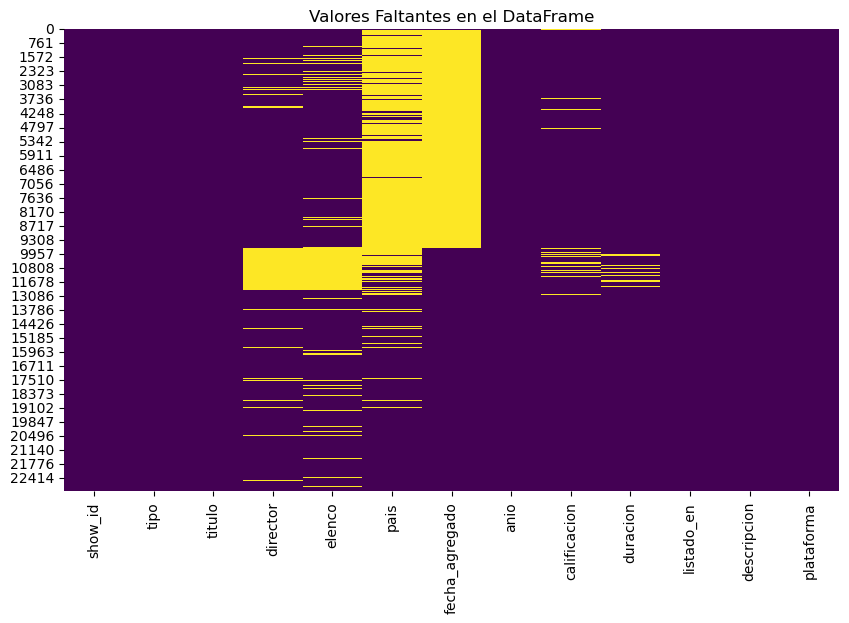

In [33]:
# visualización de valores faltantes
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('Valores Faltantes en el DataFrame')
plt.show()

In [7]:

# Agrupa los datos por los valores de la columna "plataforma" y calcula la suma de valores faltantes por columna en cada grupo
missing_values_por_plataforma = df.groupby('plataforma').apply(lambda x: x.isnull().sum()).T

# Muestra los valores faltantes por columna agrupados por "plataforma"
print(missing_values_por_plataforma)

plataforma      amazon  disney  hulu  netflix
show_id              0       0     0        0
tipo                 0       0     0        0
titulo               0       0     0        0
director           228      75   899      187
elenco             740     119   902      475
pais              6929     105   538      439
fecha_agregado    7482       0     0        0
anio                 0       0     0        0
clasificacion        0       0     0        0
duracion             0       0    81        0
listado_en           0       0     0        0
descripcion          0       0     1        0
plataforma           0       0     0        0


Vemos que la columna fecha_agregada son casi todos datos faltantes. Lo mismo pasa con la columna país. Estos no van a ser elementos útiles para la recomendación. </br>
Las columnas más importantes para el sistema de recomendación (título, descripcion, calificacion, elenco, listado_en) no tienen datos faltantes, asíque podemos trabajar con ellas sin problema. 

## Columna clasificación

In [50]:
# Contamos la cantidad de filas para cada clasificacion
contar_clas = df['clasificacion'].value_counts()
print(contar_clas)

clasificacion
TV-MA        2154
R            2152
13+          1849
TV-14        1546
16+          1272
             ... 
65 min          1
37 min          1
NOT RATED       1
129 min         1
115 min         1
Name: count, Length: 104, dtype: int64


In [51]:
# Contamos la cantidad de filas para cada calificacion
contar_clas_hulu = hulu['rating'].value_counts()
print(contar_clas_hulu)

rating
TV-14     691
TV-MA     391
R         345
TV-PG     321
PG-13     163
         ... 
34 min      1
47 min      1
65 min      1
37 min      1
71 min      1
Name: count, Length: 88, dtype: int64


Vemos que hay filas cuya clasificación aparece como cantidad de minutos. Esto indica un error o anomalía en el dataset. Vamos a indagar a qué plataforma corresponden las filas anómalas. 

In [52]:

# queremos ver que valor tiene la columna paltaforma cuando clasificacion contiene "min", "season" o "seasons" (sin distinguir entre masyuscula y minusucula)
# creamos una mascara booleana para encontrar las filas que cumplen con la condicion de contener "min"
# dado que la columna clasificacion tiene valores nulos, vamos a indicar que tome esos valores como falso
mascara = df['clasificacion'].str.contains('min|Season|Seasons', case=False, na=False)

# Aplicar la máscara booleana y obtener los valores de "plataforma"
anomalos = df.loc[mascara, 'plataforma']

# Mostrar los valores de "plataforma" que cumplen con el criterio
print(anomalos)


9718        hulu
9776        hulu
9931        hulu
10065       hulu
10139       hulu
          ...   
12627       hulu
12661       hulu
18282    netflix
18535    netflix
18554    netflix
Name: plataforma, Length: 295, dtype: object


A que plataformas pertenecen estos titulos?

In [53]:
print(anomalos.unique())

['hulu' 'netflix']


Cuantos hay corresponden a Netflix y cuántos en Hulu??

In [54]:
contar_anomalos = anomalos.value_counts()
print(contar_anomalos)

plataforma
hulu       292
netflix      3
Name: count, dtype: int64


Vemos que no se trata de un problema que afecte a la mayoría de las películas. Pero dado que la clasificación es un dato de vital imortancia a tener en cuenta en un algoritmo de recomendación y que la recolección de esos datos escapa a los objetivos de este proyecto, tomamos la decisión de eliminar las filas anómalas de los análisis posteriores, así como aquellas filas con valores faltantes en esta columna. 

In [58]:
# descartamos filas con valores faltantes en clasificacion
df2 = df.dropna(subset=['clasificacion'])
df2.shape

(15857, 13)

In [61]:
# descartamos filas anomalas para clasificacion
filas_anomalas = df2.index[df2['clasificacion'].str.contains('min|Season|Seasons', case=False, na=False)]

# Elimina las filas correspondientes a esos índices del DataFrame original
df2 = df2.drop(filas_anomalas)

In [62]:
df2.shape

(15562, 13)

In [63]:
df = df2

In [64]:
# Contamos la cantidad de filas para cada clasificacion
contar_clas2 = df['clasificacion'].value_counts()
print(contar_clas2)

clasificacion
TV-MA        2154
R            2152
13+          1849
TV-14        1546
16+          1272
PG-13        1112
18+          1097
ALL           988
PG            880
TV-PG         770
G             405
TV-G          395
7+            288
NR            270
TV-Y7         179
TV-Y          140
UNRATED        33
TV-Y7-FV       12
NC-17           6
UR              3
NOT_RATE        3
AGES_18_        3
AGES_16_        2
NOT RATED       1
ALL_AGES        1
16              1
Name: count, dtype: int64


In [71]:
df['clasificacion'] = df['clasificacion'].replace(['UNRATED', 'UR'], 'UR/No clasificado')
df['clasificacion'] = df['clasificacion'].replace(['NOT RATED', 'NOT_RATE', 'NR'], 'NR/Sin clasificacion')
df['clasificacion'] = df['clasificacion'].replace(['ALL', 'ALL_AGES'], 'ALL')
df['clasificacion'] = df['clasificacion'].replace(['AGES_18_'], '18+')
df['clasificacion'] = df['clasificacion'].replace(['16','AGES_16_','16+'], '16+')

In [72]:
# Contamos la cantidad de filas para cada clasificacion
contar_clas3 = df['clasificacion'].value_counts()
print(contar_clas3)

clasificacion
TV-MA                2154
R                    2152
13+                  1849
TV-14                1546
16+                  1275
PG-13                1112
18+                  1100
ALL                   989
PG                    880
TV-PG                 770
G                     405
TV-G                  395
7+                    288
Sin clasificacion     274
TV-Y7                 179
TV-Y                  140
No clasificado         36
TV-Y7-FV               12
NC-17                   6
Name: count, dtype: int64


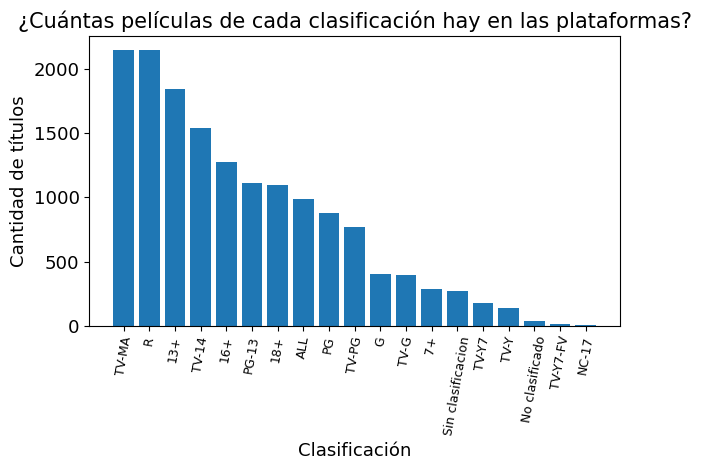

In [81]:
# Crear el gráfico de barras
plt.bar(contar_clas3.index, contar_clas3.values)
plt.xlabel('Clasificación', fontsize=13)
plt.ylabel('Cantidad de títulos', fontsize=13)
plt.title('¿Cuántas películas de cada clasificación hay en las plataformas?', fontsize=15)
plt.xticks(rotation=80, fontsize=9)
plt.yticks(fontsize=13)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [83]:
# Vamos a guardar los dataframe en archivos CSV
df.to_csv('..\\datasets\\peliculas_limpio.csv', index=False)

## Columna duracion

In [84]:
# vemos la columna duracion para las películas
df.head(3)

,show_id,tipo,titulo,director,elenco,pais,fecha_agregado,anio,clasificacion,duracion,listado_en,descripcion,plataforma
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...,amazon
16,s17,Movie,Zoombies,Glenn Miller,"Marcus Anderson, Kaiwi Lyman, Andrew Asper",NaN,NaN,2016,13+,87 min,"Horror, Science Fiction",When a strange virus quickly spreads through a...,amazon
19,s20,Movie,Zoe,Drake Doremus,"Ewan McGregor, Léa Seydoux, Theo James, Mirand...",NaN,NaN,2018,R,104 min,Science Fiction,ZOE tells a tale of forbidden love between an ...,amazon


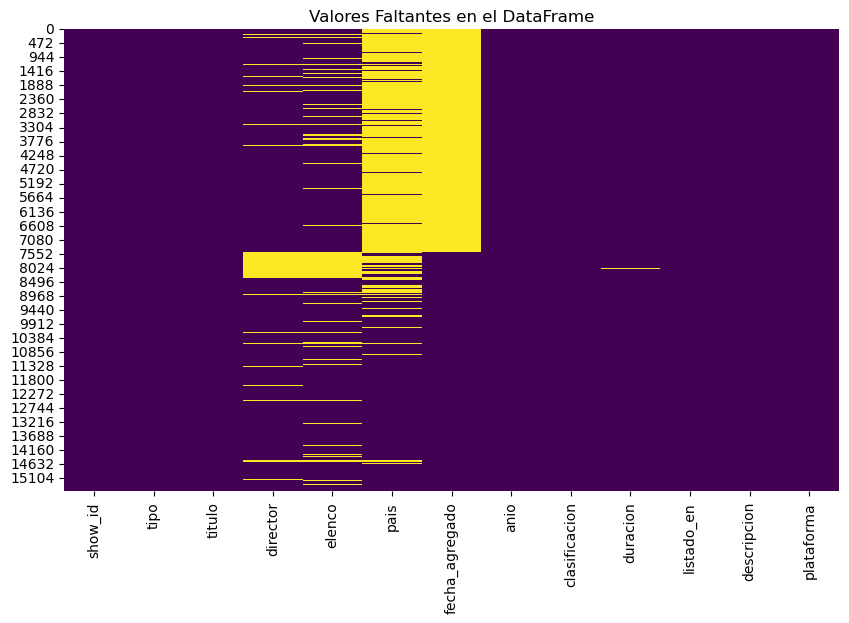

In [6]:
# visualización de valores faltantes
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('Valores Faltantes en el DataFrame')
plt.show()

Vemos que para las películas, la duracion se expresa como cantidad de minutos.  </br>
Vamos a procesar los datos de la columna para poder utilizarlos. 

In [11]:
df = pd.read_csv('..\\datasets\\peliculas_limpio.csv')

In [12]:
# Quitamos "min" y convertir a integer 
df['duracion'] = df['duracion'].str.replace(' min', '')
print(df['duracion'])

0        110
1         87
2        104
3         62
4         94
        ... 
15557    108
15558    106
15559    107
15560    112
15561      2
Name: duracion, Length: 15562, dtype: object


In [13]:
df['duracion'] = df['duracion'].fillna(0).astype(int)

In [15]:
uniquedur = df['duracion'].unique()
print(uniquedur)

[110  87 104  62  94  50  86  36  37 103   9  18  14  20  19  22  60   6
  54   5  84 126 125 109  89  85  40 111  33  34  95  99  78  77  55  53
 115  58  49 135  91  64 131  59  52 122  92  90 102  65 114  56 136  70
 138 113 100 480   4  30 152  68  57  96  98  88  31 151 149 141 121  48
 140  46  51 106  93  27  69 107 108  38 157  43 118 112  15 116 142  75
  71  42  81  32  66 159  67  29 132 101 164  73  80  61  79  83  44  45
 120  26  97  74  23 105  82  11 127 161  72 123   0 124 143  35  47 170
   3 146 601 154 128 133 153 148 119  63 169 174 144   7 137  76  39 134
 163 139   1 145 162  41 147 155 117 167  28  25 180   2 541 240 129 178
  24 171  21 172 173  10 166 160 130 479  13   8  17  16 158 183  12 150
 481 181 156 540 177 550 485 193 165 175 188 187 176 168 190 185 209 192
 182 207 269 191 229 189 273 204 212 224 203 194 233 237 230 195 253 208
 186 312 214 179 200 196 228 205 201]


### ¿Cuántas películas de cada año hay en cada plataforma?

<Figure size 1000x600 with 0 Axes>

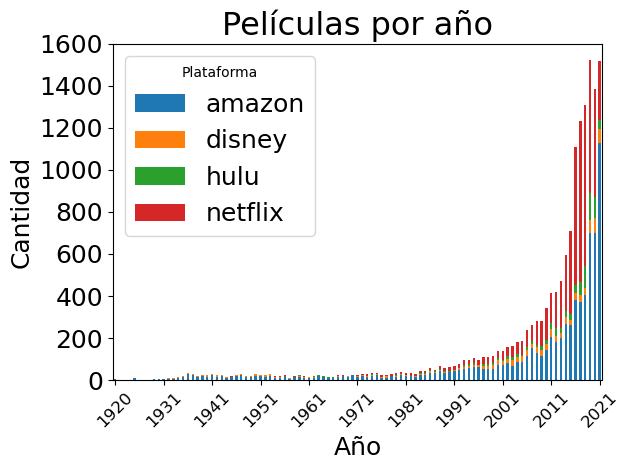

In [23]:
# Agrupar por tipo y anio, y contar la cantidad de filas
contar_anio = df.groupby(['anio', 'plataforma']).size().unstack()

# Crear un gráfico de barras apiladas con anio en el eje x
plt.figure(figsize=(10, 6))
contar_anio.plot(kind='bar', stacked=True)
plt.xlabel('Año', fontsize = 18)
plt.ylabel('Cantidad', fontsize = 18)
plt.title('Películas por año', fontsize = 23)
plt.legend(title='Plataforma', fontsize = 18)
plt.xticks(range(0, len(contar_anio), 10), rotation = 45, fontsize = 12) # eliminar etiquetas de eje x porque queda muy cargado
plt.yticks(fontsize = 18)
plt.tight_layout()
plt.show()

## Columna listado_en: categorías y géneros

In [24]:
df['listado_en'].head(3)

0       Drama, International
1    Horror, Science Fiction
2            Science Fiction
Name: listado_en, dtype: object

Vemos que la columna listado_en contiene varios valores separados por comas. Vamos a separar cada valor en una columna para poder utilizarlas para agrupar las filas. 

In [35]:
# dividimos los valores en columnas separadas, al mismo tiempo que generamos un dataset nuevo de generos, que relaciona los show_id con los generos de cada show
generos = pd.concat([df['show_id'],df['listado_en'].str.split(',', expand=True)], axis=1)
print(generos)

      show_id                 0                  1                 2        3  \
0          s2             Drama      International              None     None   
1         s17            Horror    Science Fiction              None     None   
2         s20   Science Fiction               None              None     None   
3         s23              Arts      Entertainment       and Culture   Comedy   
4         s25             Drama               None              None     None   
...       ...               ...                ...               ...      ...   
15557   s1446  Action-Adventure             Family   Science Fiction     None   
15558   s1447  Action-Adventure             Comedy            Family     None   
15559   s1448      Biographical             Comedy             Drama     None   
15560   s1449             Buddy             Comedy     Coming of Age     None   
15561   s1450  Action-Adventure   Animals & Nature         Animation     None   

            4  
0        No

In [37]:
generos.columns = ['show_id', 'gen1', 'gen2', 'gen3', 'gen4', 'gen5']

In [38]:
print(generos)

      show_id              gen1               gen2              gen3     gen4  \
0          s2             Drama      International              None     None   
1         s17            Horror    Science Fiction              None     None   
2         s20   Science Fiction               None              None     None   
3         s23              Arts      Entertainment       and Culture   Comedy   
4         s25             Drama               None              None     None   
...       ...               ...                ...               ...      ...   
15557   s1446  Action-Adventure             Family   Science Fiction     None   
15558   s1447  Action-Adventure             Comedy            Family     None   
15559   s1448      Biographical             Comedy             Drama     None   
15560   s1449             Buddy             Comedy     Coming of Age     None   
15561   s1450  Action-Adventure   Animals & Nature         Animation     None   

         gen5  
0        No

# Depurando lista de categorías y géneros

Encontrar todos los posibles géneros y categorías, sin repeticiones:

In [58]:
gen = pd.concat([generos['gen1'],generos['gen2'],generos['gen3'],generos['gen4'],generos['gen5']],axis=0)
gen.shape

(77810,)

In [64]:
gen_unicos = gen.unique()
print(gen_unicos)

['Drama' 'Horror' 'Science Fiction' 'Arts' 'Documentary'
 'Music Videos and Concerts' 'Fitness' 'Faith and Spirituality'
 'Special Interest' 'Action' 'Fantasy' 'Suspense' 'Kids' 'Comedy'
 'Western' 'Animation' 'Arthouse' 'Military and War' 'Anime'
 'International' 'Sports' 'Adventure' 'Romance' 'Young Adult Audience'
 'LGBTQ' 'Historical' 'Thriller' 'Documentaries' 'Reality' 'Black Stories'
 'Crime' 'Classics' 'Cooking & Food' 'Family' 'Music' 'News' 'Latino'
 'History' 'Mystery' 'Cartoons' 'Science & Technology'
 'Children & Family Movies' 'Dramas' 'Comedies' 'Thrillers'
 'Horror Movies' 'Action & Adventure' 'International Movies'
 'Sci-Fi & Fantasy' 'Classic Movies' 'Stand-Up Comedy' 'Movies'
 'Anime Features' 'Cult Movies' 'Independent Movies' 'Music & Musicals'
 'Romantic Movies' 'LGBTQ Movies' 'Sports Movies' 'Musical' 'Biographical'
 'Animals & Nature' 'Action-Adventure' 'Lifestyle' 'Coming of Age'
 'Concert Film' 'Variety' 'Anthology' 'Dance' 'Buddy' ' International'
 ' Science 

In [67]:
# Descartamos valor None 
gen_unicos = list(filter(lambda x: x is not None, gen_unicos))

In [68]:
# ordenamos alfabeticamente para detectar duplicados mas facilmente
print(sorted(gen_unicos))

[' Adult Animation', ' Adventure', ' Animals & Nature', ' Animation', ' Anime', ' Anime Features', ' Anthology', ' Arthouse', ' Arts', ' Biographical', ' Black Stories', ' Buddy', ' Cartoons', ' Children & Family Movies', ' Classic Movies', ' Classics', ' Comedies', ' Comedy', ' Coming of Age', ' Crime', ' Cult Movies', ' Dance', ' Disaster', ' Documentaries', ' Documentary', ' Drama', ' Dramas', ' Entertainment', ' Faith & Spirituality', ' Faith and Spirituality', ' Family', ' Fantasy', ' Historical', ' History', ' Horror', ' Horror Movies', ' Independent Movies', ' International', ' International Movies', ' Kids', ' LGBTQ', ' LGBTQ Movies', ' LGBTQ+', ' Latino', ' Lifestyle', ' Lifestyle & Culture', ' Medical', ' Military and War', ' Music', ' Music & Musicals', ' Music Videos and Concerts', ' Musical', ' Mystery', ' News', ' Parody', ' Reality', ' Romance', ' Romantic Comedy', ' Romantic Movies', ' Sci-Fi & Fantasy', ' Science & Technology', ' Science Fiction', ' Special Interest', 